<a href="https://colab.research.google.com/github/asfdqwtdsva123/MachineLearningProgramming/blob/main/5%EC%A3%BC%EC%B0%A8/2)_%ED%95%84%EA%B8%B0%EC%B2%B4_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers, models

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

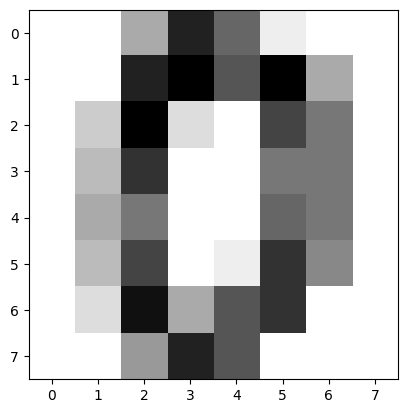

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [ ]:
X_train.shape

(1437, 64)

In [ ]:
y_train.shape

(1437,)

In [ ]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(64,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")   # 클래스 수 맞춤
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    # 원-핫 인코딩 하지 않아도 레이블이 정수 형태일 경우, sparse_categorical_crossentropy를 사용할 수 있다
    # categorical_crossentropy를 사용한다면 y 레이블을 모두 인코딩 해야 하므로
    # 한 줄만 수정해도 되는 sparse_categorical_entropy를 사용했다.
    # 내부적으로 레이블 간 상관관계를 알아서 다 끊어줌
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1284 - loss: 5.6544 - val_accuracy: 0.4722 - val_loss: 1.6502
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3710 - loss: 1.9311 - val_accuracy: 0.6667 - val_loss: 1.0909
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5779 - loss: 1.3151 - val_accuracy: 0.8264 - val_loss: 0.6382
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 1.0071 - val_accuracy: 0.8819 - val_loss: 0.4065
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7903 - loss: 0.6234 - val_accuracy: 0.9236 - val_loss: 0.2998
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8544 - loss: 0.4622 - val_accuracy: 0.9306 - val_loss: 0.2382
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8632 - loss: 0.4039 - val_accuracy: 0.9375 - val_loss: 0.2141
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9000 - loss: 0.3082 - val_accuracy: 0.9514 - val_loss

In [ ]:
y_pred = model.predict(X_test)

# np.argmax(y_pred, axis=1) 일 경우, y_test는 이미 1차원인데 반해 2차원 배열의 값을 요구해 오류 발생
# 따라서 argmax를 사용하지 않는다
y_test_class = y_test
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


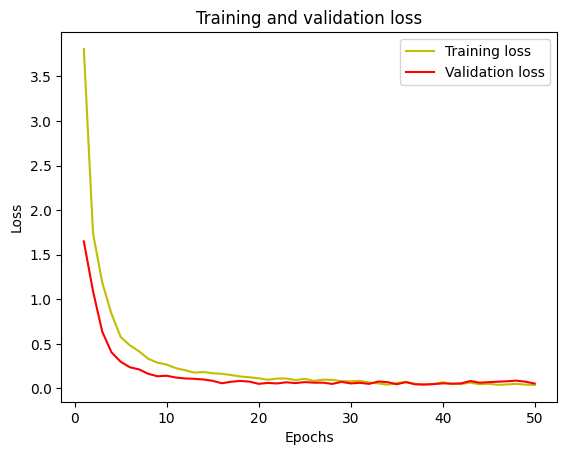

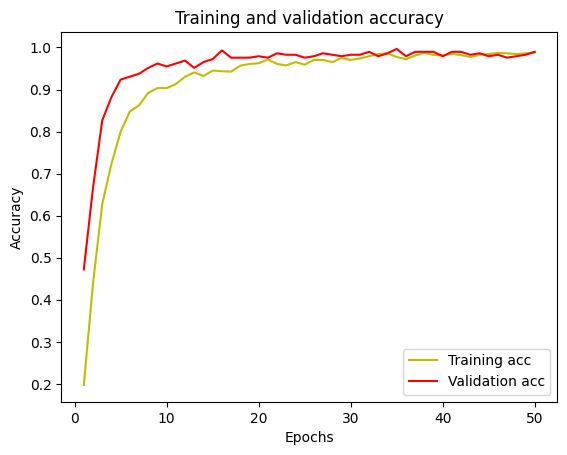

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.93      0.98      0.95        43
           2       0.94      1.00      0.97        31
           3       1.00      0.94      0.97        33
           4       0.97      1.00      0.99        33
           5       0.98      0.92      0.95        48
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        36
           8       0.97      0.86      0.91        36
           9       0.89      0.97      0.93        34

    accuracy                           0.96       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.96      0.96       360

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  1 31  0  0  0  0  0  1]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  1 44  1  0  0  2]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0